# Data Processing 
1. Encoding categorical features into numeric
2. Standardize the continous features, Age in this case
3. Logistic regression. Run a gridsearch for best parameter
5. Knn neighbor and run gridsearch
6. RandomForest model and Randomsearch
4. pipeline



In this step, categorical features need be encoded to numeric and numeric features need to be standardized either by StandardScaler or by MinMaxScaler
- then we will try LogisticRegression
- then knn
- then DecisionTree
- then RandomForest

- gridSearch will be used to optemize for hyper parameters and cross_validation with cv=5 will be used to test the model
- use pca to get a sense of the influence the features have on the response variable


### Load data


In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= [8,6]
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, confusion_matrix, classification_report, roc_auc_score, auc
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score,log_loss
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('../fixed data/diabetes_data.csv', index_col = 0)

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

In [5]:
#change the category of all categorical variables to catgory
for col in df.columns[1:]:
    df[col] = df[col].astype('category')

In [6]:
df.dtypes

Age                      int64
Gender                category
Polyuria              category
Polydipsia            category
sudden weight loss    category
weakness              category
Polyphagia            category
Genital thrush        category
visual blurring       category
Itching               category
Irritability          category
delayed healing       category
partial paresis       category
muscle stiffness      category
Alopecia              category
Obesity               category
Class                 category
dtype: object

## 1. Define target variable y and data X

### a. define target variable y

In [7]:
y = df['Class'].replace({'Positive':1,'Negative': 0})
y.shape


(520,)

Visualize target variable 

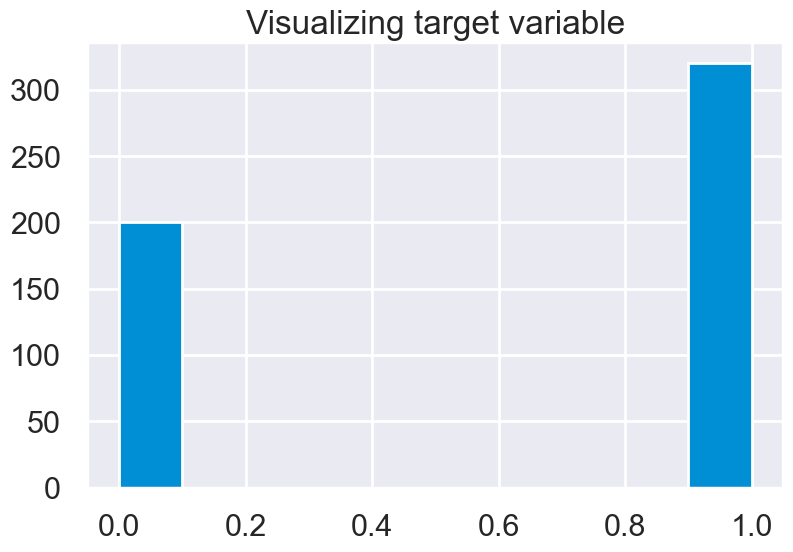

In [178]:
#plot target variable
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
sns.set_context('poster')
#plt.figure(figsize=(10,))
plt.hist(y,density= False)
plt.title('Visualizing target variable');

### b. Define X

In [9]:
X = df.drop('Class',axis=1)
X.head()
X.shape,X.columns

((520, 16),
 Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
        'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
        'Itching', 'Irritability', 'delayed healing', 'partial paresis',
        'muscle stiffness', 'Alopecia', 'Obesity'],
       dtype='object'))

### c. hot encode all the non numeric variables, and y 

In [154]:
# age is continuous so it is not included in get_dummies
numeric_X = pd.get_dummies(X.iloc[:,1:], drop_first=True)
numeric_X.head()

,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [152]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [156]:
#join the Age variable to dataframe
#numeric_X = numeric_X.join(X.Age)
numeric_X = pd.concat([X.Age,numeric_X],axis=1)
numeric_X.shape,numeric_X.columns


((520, 16),
 Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
        'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
        'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
        'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
        'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes'],
       dtype='object'))

In [157]:
numeric_X.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


### d. split dataset into trainig and test sets

In [158]:
X_train,X_test,y_train,y_test = train_test_split(numeric_X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((416, 16), (104, 16), (416,), (104,))

In [159]:
X_train.columns


Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
       'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes'],
      dtype='object')

### d. Age is a continuous variable and we need to scale it for logistic regression

In [15]:
#import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [160]:
#copy X_train and X_test to see which of standardscaler or minmaxscaler works better
#X_train_ss and X_test_ss will be used for standardscaler and X_train, X_test will be used for minmax
X_train_ss = X_train.copy()
X_test_ss = X_test.copy()
X_train.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
225,29,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
431,42,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0
141,62,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0
11,38,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0
206,60,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0


In [161]:
#try both scaling and standardizing
ss = StandardScaler()
ss.fit(X_train_ss[['Age']])
X_train_ss[['Age']] = ss.transform(X_train_ss[['Age']])
X_test_ss[['Age']] = ss.transform(X_test_ss[['Age']])

In [166]:
X_test_ss.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
228,-0.232428,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0
368,0.730461,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0
371,0.730461,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,0.810702,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
464,-1.436039,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
#normalize data and transform training data
pd.options.mode.chained_assignment = None # not display the error message
norm = MinMaxScaler()
X_train[['Age']] = norm.fit_transform(X_train[['Age']])


In [164]:
X_train.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
225,0.175676,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
431,0.351351,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0
141,0.621622,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0
11,0.297297,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0
206,0.594595,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0


In [165]:
#normalize test data
X_test[['Age']] = norm.transform(X_test[['Age']])
X_test.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
228,0.391892,1,0,0,0,1,0,0,0,1,1,1,1,0,0,0
368,0.554054,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0
371,0.554054,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
464,0.189189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


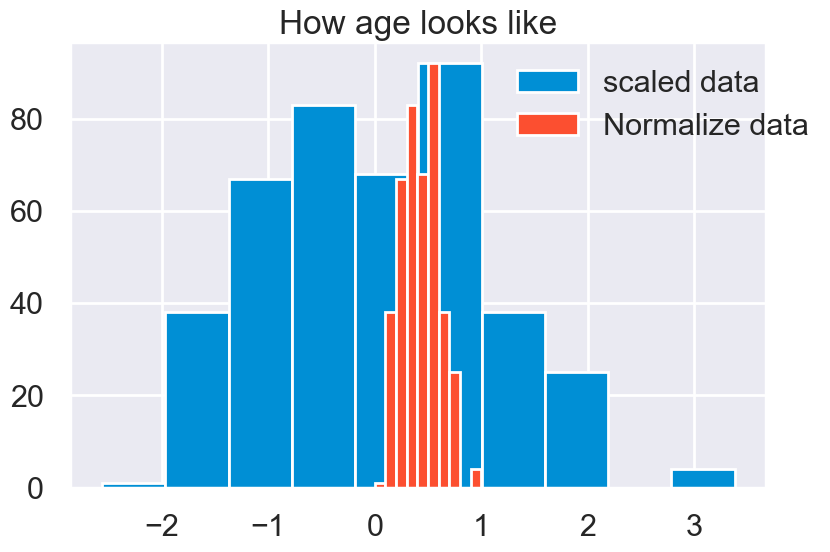

In [184]:

X_train_ss['Age'].hist(label='scaled data')
X_train['Age'].hist(label = 'Normalize data')
plt.legend()
plt.title('How age looks like')
plt.legend(loc='upper right',bbox_to_anchor=(1.10, 1));

In [191]:
X_train_ss.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
225,-1.516280,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
431,-0.473150,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0
141,1.131664,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0
11,-0.794113,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0
206,0.971183,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0


In [192]:
X_train.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
225,0.175676,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
431,0.351351,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0
141,0.621622,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0
11,0.297297,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0
206,0.594595,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0


### 3. Implement logistic regression model on train data

In [193]:
from sklearn.linear_model import LogisticRegression
 

In [194]:
#fit logistic regression with default settings of C=1, and l2 regularizaion  to scaled data and predict
lr_1 = LogisticRegression()
model_ss = lr_1.fit(X_train_ss,y_train)
y_pred_ss = model_ss.predict(X_test_ss)

In [186]:
model_ss.coef_.shape


(1, 16)

Since we are detecting disease, there is a higher cost to false negatives, someone is sick and model shows they are not sick, to false positives, someone is not sick and it shows that they are sick. If a person is sick, then they need treatment right away. However, we also care about false positives because we don't want to treat someone who doesn't need treatment.

In [195]:
#fit logistic regression with default settings of C=1, and l2 regularizaion  to normalized data and predict
lr_2 = LogisticRegression()
model_m = lr_2.fit(X_train,y_train)
y_pred_m = model_m.predict(X_test)


In [196]:
#measure score of each model
print('score for scaled data:',model_ss.score(X_test_ss,y_test),'score for normalized data:',model_m.score(X_test,y_test))

score for scaled data: 0.9326923076923077 score for normalized data: 0.9326923076923077


In [197]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('accuracy tp+tn/all: ', accuracy_score(y_test,y_pred_ss),accuracy_score(y_test,y_pred_m))


accuracy tp+tn/all:  0.9326923076923077 0.9326923076923077


since the data has more positive cases than negative (60% positive) so accuracy might not be the best metric to use 

In [53]:
#pd.crosstab(y_test, y_pred_m, rownames = ['Actual'],colnames=['predicted'])

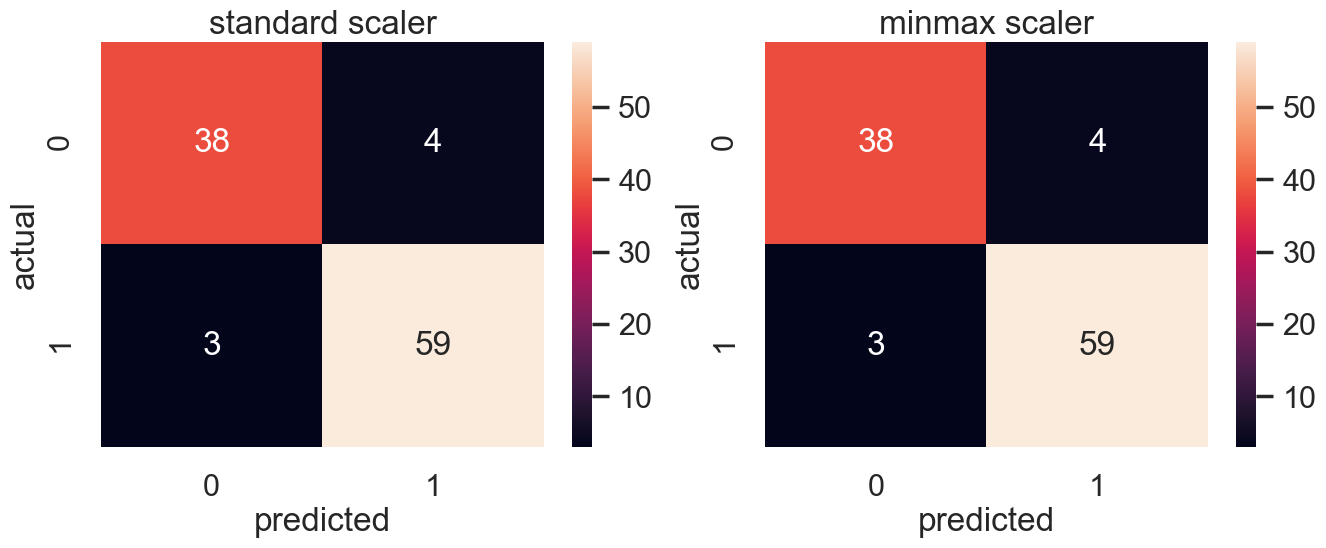

In [198]:
plt.figure(figsize=(14,5))
c_matrix_ss = confusion_matrix(y_test,y_pred_ss)
c_matrix_m = confusion_matrix(y_test,y_pred_m)
plt.subplot(1,2,1)
sns.heatmap(c_matrix_ss,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('standard scaler')

plt.subplot(1,2,2)
sns.heatmap(c_matrix_m,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('minmax scaler');

In [199]:
#classification report for standardized data
print(classification_report(y_test,y_pred_ss))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.94      0.95      0.94        62

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104



In [200]:
#classification report normalized data
print(classification_report(y_test,y_pred_m))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.94      0.95      0.94        62

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104



Both methods of standardization methods give similar results, however StandardScaler has a slightly better recall for the negative class

Normalizing the data gives better results in all the metrics so normalized data will be used in model



### Roc curve of false positives vs. true positives

Text(0.5, 1.0, 'ROC curve for scaled data')

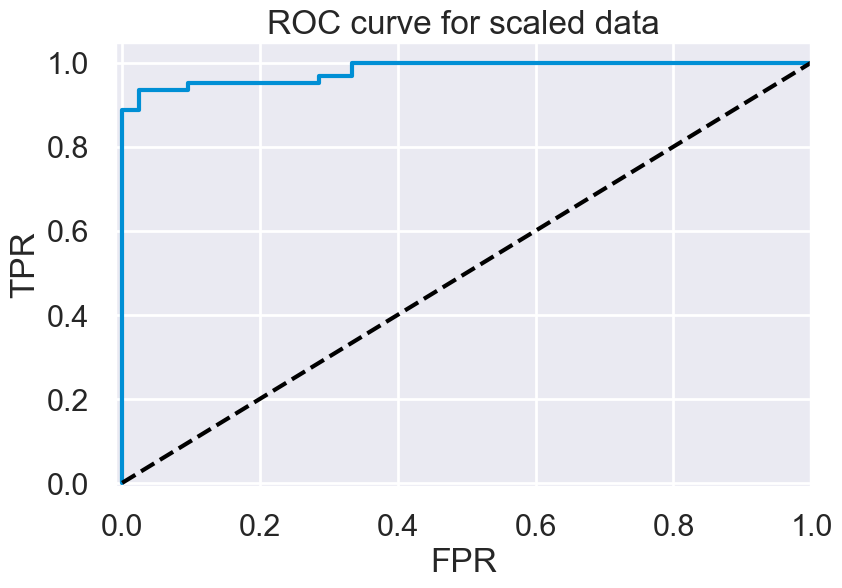

In [201]:

y_pred_proba_ss = model_ss.predict_proba(X_test_ss)[:,1]
fp,tp,threshold = roc_curve(y_test,y_pred_proba_ss)

plt.plot(fp,tp)
plt.plot([0,1],[0,1],linestyle='--', c='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01,1])
plt.ylim([-0.01,1.05])
plt.title('ROC curve for scaled data')

Text(0.5, 1.0, 'ROC curve for normalized data')

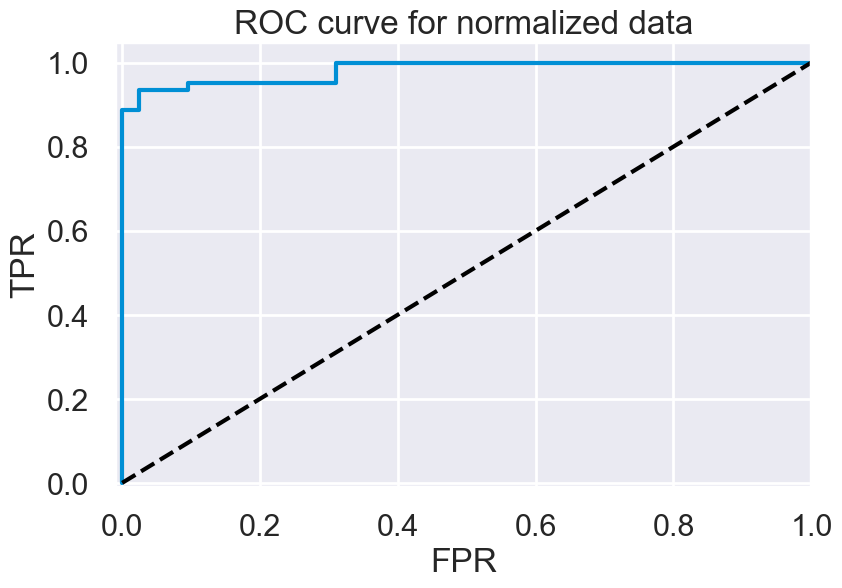

In [202]:
y_pred_proba_m = model_m.predict_proba(X_test)[:,1]

fp,tp,threshold = roc_curve(y_test,y_pred_proba_m)
roc_auc_score(y_test,y_pred_proba_m)
plt.plot(fp,tp)
plt.plot([0,1],[0,1],linestyle='--', c='k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([-0.01,1])
plt.ylim([-0.01,1.05])
plt.title('ROC curve for normalized data')

AUC is a measure of the area under the curve. It shows how well the model distinguishes between positives and 
negatives. The higher the auc the better the model is at predicting 0s and 1s.

In [203]:
roc_auc_score(y_test,y_pred_ss),roc_auc_score(y_test,y_pred_m)

(0.9281874039938557, 0.9281874039938557)

From the auc scores and the graphs and the other metrics, it is apparent that there is no difference between standard scaler and the minmax scaler, so standard scaler will be used.

## pca

(0.0, 16.0)

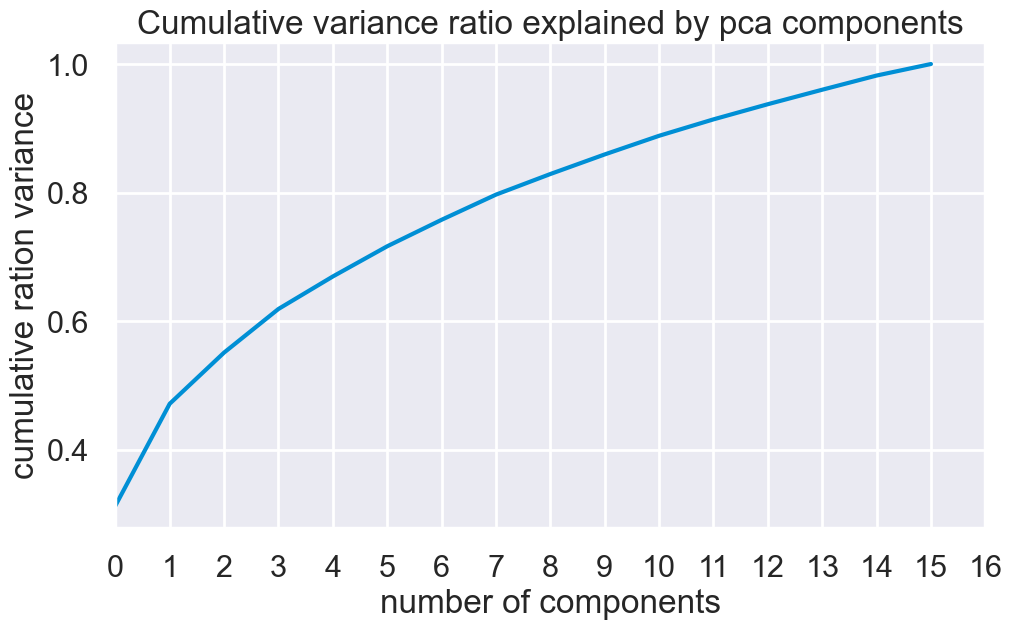

In [204]:
from sklearn.decomposition import PCA
pca = PCA()
data_pca = pca.fit(X_train_ss)
plt.figure(figsize=(10,6))
plt.plot(data_pca.explained_variance_ratio_.cumsum())
tix = np.arange(0,17)
plt.xlabel('number of components')
plt.ylabel('cumulative ration variance')
plt.xticks(tix)
plt.title('Cumulative variance ratio explained by pca components')
plt.xlim(0,16)
#plt.ylim(0,1.02);

The first 6 components explain 70% of the variance and 10 components account for almost 90%. Component 14 15 and 16 d not account for any of the variance it seems.

In [84]:
pca.explained_variance_

array([1.33052912, 0.71872874, 0.37139404, 0.30602413, 0.22103177,
       0.20859202, 0.18894752, 0.17594338, 0.15181938, 0.134806  ,
       0.12740273, 0.12249626, 0.11119438, 0.10351071, 0.09129892,
       0.07857702])

In [118]:
#plt.rcParams.update(plt.rcParamsDefault)


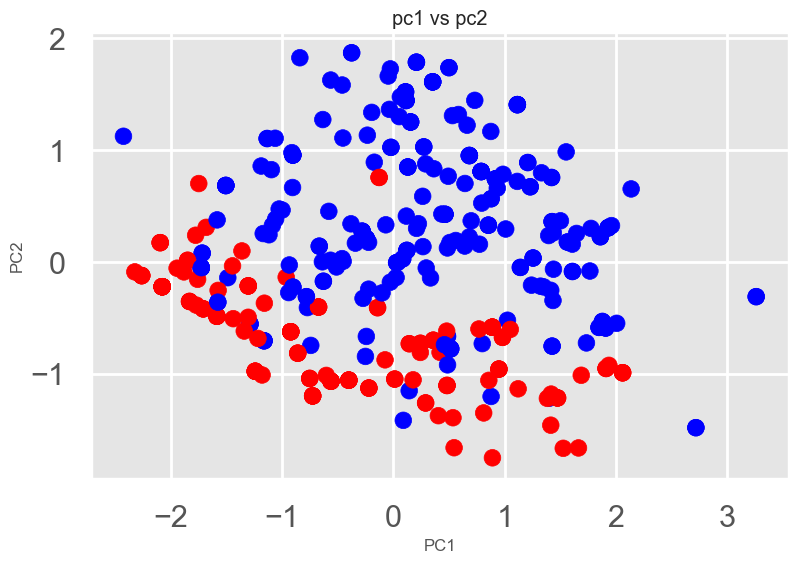

In [325]:
plt.style.use('ggplot')
pca_2 = PCA(n_components=2)
color_dict = {0:'red',1:'blue'}
color_label = [color_dict[label] for label in y_train]
X_train_pca = pca_2.fit_transform(X_train_ss)
plt.scatter(x=X_train_pca[:,0],y=X_train_pca[:,1],c=color_label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('pc1 vs pc2');


there is a clear separation between the two classes 

###  GridSearch

Tuning C parameter: C parameter is the inverse of regularization parameter lambda. When C is too large, lambda is small which means the model can become too complex and over fit the data. However, when C is too small, lambda is large which means model can become too simple and over fit the data.

In [220]:
from sklearn.model_selection import GridSearchCV

In [232]:
#since this is an imbalaced datasets and False negatives are very costly the scoring is going to be f1 score, which is
#the harmonic mean for precision and recall
#parameters to be tested
params = {'C':[0.0001,0.001,0.01,0.1,1,5,10,25,50,100],'penalty' : [ 'l2']}
lr = LogisticRegression()#solver='liblinear'
grid_lr = GridSearchCV(lr, param_grid = params, scoring = 'f1',cv=5)
best_model_lr = grid_lr.fit(X_train_ss,y_train)
best_model_lr

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100],
                         'penalty': ['l2']},
             scoring='f1')

In [233]:
#best parameters
best_model_lr.best_params_,grid_lr.best_score_

({'C': 1, 'penalty': 'l2'}, 0.941588225290042)

In [234]:
#predicting using best model
y_pred_lr = best_model_lr.predict(X_test_ss)


In [235]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.94      0.95      0.94        62

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104



Text(0.5, 1.0, 'KNeighbor Classifier confusion Matrix')

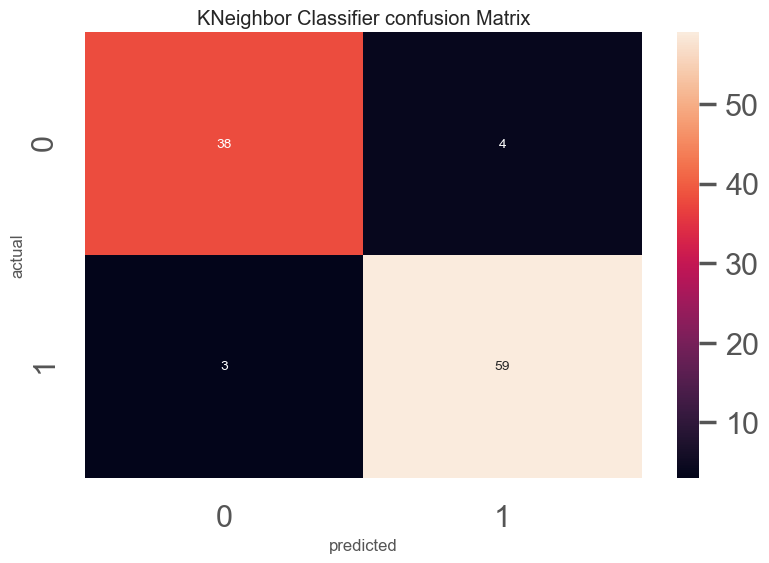

In [236]:
#confusion matirix
lr_matrix = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(lr_matrix,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('KNeighbor Classifier confusion Matrix')

There is an improvement in the f1 score from 93% to 94% for True positives and auc score went up from 92.1% to 93.2%


### 4. Knn neighbor

In [249]:
from sklearn.neighbors import KNeighborsClassifier  

In [250]:
knn = KNeighborsClassifier()
model_knn = knn.fit(X_train_ss,y_train)
y_pred_knn = knn.predict(X_test_ss)

In [251]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.98      0.98        62

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



### Gridsearch KNeighbors Classifier

In [282]:
params_knn = {'n_neighbors':[1,3,5,11,15,19,20],
             'weights':['uniform','distance'],
             'metric':['eucledian','manhattan']}
grid_knn = GridSearchCV(model_knn,param_grid = params_knn,scoring='f1',cv=5,verbose=1,n_jobs=-1)
best_model_knn = grid_knn.fit(X_train_ss,y_train)
y_pred_knn= best_model_knn.predict(X_test_ss)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Users/Rime/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.97165649 0.97165649 0.94494792 0.96362326
 0.93486315 0.96177095 0.89735911 0.94674587 0.90232589 0.95057469
 0.88338924 0.94864468 0.87602343 0.94398975]
  category=UserWarning


In [283]:
best_model_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [316]:
best_model_knn.best_score_


0.9716564857799315

In [284]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.98      0.99        62

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



Text(0.5, 1.0, 'KNeighbor Classifier confusion Matrix')

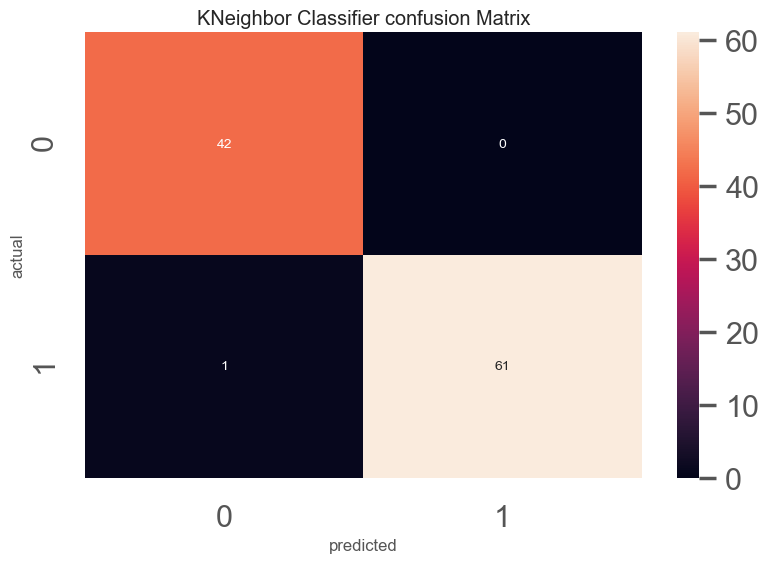

In [256]:
#confusion matirix
knn_matrix = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(knn_matrix,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('KNeighbor Classifier confusion Matrix')

There is an improvement in the false negatives, which is what I am maximizing for

### 6. Decision Tree

In [260]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [289]:
#fit model with default parameters
dt = DecisionTreeClassifier()

dt.fit(X_train_ss,y_train)
y_pred_dt = dt.predict(X_test_ss)

In [290]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.98      0.94      0.96        62

    accuracy                           0.95       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



In [273]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Grid search for Decision Tree

In [299]:
params= {'criterion':['gini','entropy'],
        'min_samples_split':[2,10,20],
        'max_depth':[None,2,5,10],
        'min_samples_leaf':[1,5,10],
        'max_leaf_nodes':[None,5,10,20]}
dt = DecisionTreeClassifier()
random_dt = GridSearchCV(estimator=dt,param_grid=params,cv=5,n_jobs=-1,scoring='f1')#param_distributions,,random_state=1
best_model_dt = random_dt.fit(X_train_ss,y_train)

In [300]:
best_model_dt.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [303]:
y_pred_g_best = best_model_dt.predict(X_test_ss)



In [304]:
print(classification_report(y_test,y_pred_rt_best))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.98      0.95      0.97        62

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



Text(0.5, 1.0, 'Decision Tree')

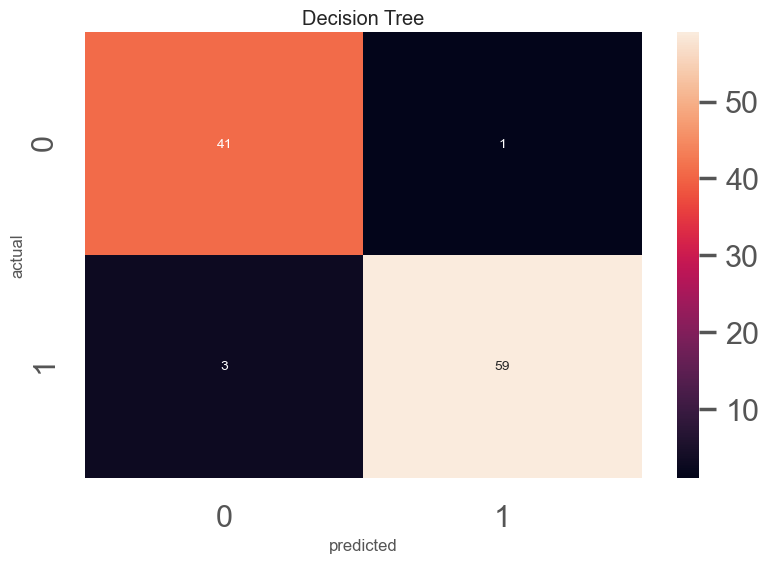

In [308]:
matrix_dt = confusion_matrix(y_test,y_pred_g_best)
sns.heatmap(matrix_dt,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Decision Tree')

### 7. Random forest classifier

In [317]:
#fit random forest with default parameters
model_rf = RandomForestClassifier().fit(X_train_ss,y_train)
y_pred_rf = model_rf.predict(X_test_ss)
model_rf.score(X_test_ss,y_test)
confusion_matrix(y_test,y_pred_rf)

array([[41,  1],
       [ 2, 60]])

In [311]:
params_rf = {'bootstrap':[True],
          'max_depth':[10,20,30,40,50,60,70,80,90,100,None],
          'max_features':['sqrt','auto','log2'],
          'min_samples_split':[2,5,10],
          'min_samples_leaf':[1,2,4],
          'n_estimators':[200, 400,600, 800, 1000,1200,1400, 1600, 1800, 2000]}
rf = RandomForestClassifier()
model_rf = RandomizedSearchCV(estimator=rf,param_distributions=params_rf,n_iter=100,cv=5,random_state=1,n_jobs=-1)
best_model_rf = model_rf.fit(X_train_ss,y_train)

In [312]:
y_pred_rf = best_model_rf.predict(X_test_ss)

we care about false positives, here we have 0 fn but 1 false positive

In [313]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.98      0.97      0.98        62

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



Text(0.5, 1.0, 'Random Forest')

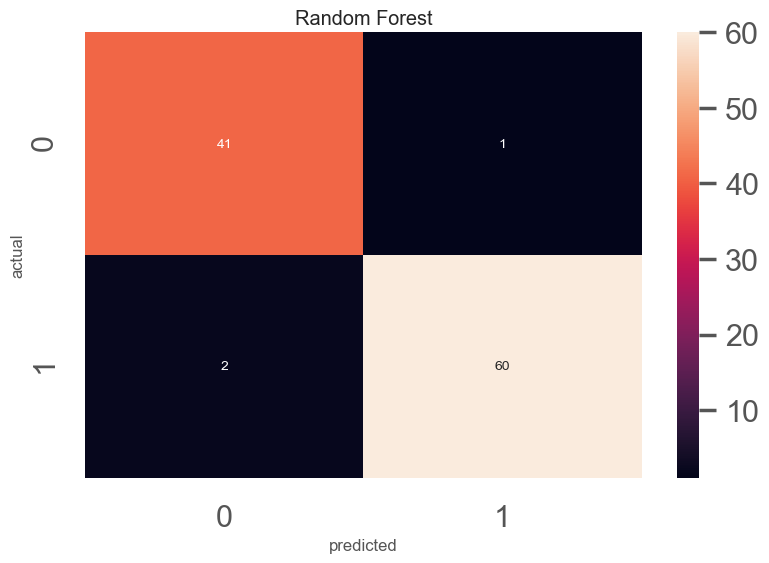

In [314]:
matrix_rf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(matrix_rf,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Random Forest')

The best model that gives me the best results is the kneighbors. It gave me the highest f1 score and the lowest number of false negatives